In [2]:
pip install pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/5a/f2/d079f4785d326e3868f4232108e622a307c2676023a274d9be2754dafc2a/pandas-2.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.6 MB/s eta 0:00:08
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.6 MB 1.8 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
def seperate_labels(df, lang):
    labels = []

    def get_label(line):
        if '\t' in line:
            temp = line.split('\t')
            sentence, label = temp[0], temp[1]
            if label.lower() == 'not-' + lang:
                return None
            labels.append(label)
            return sentence
        return None

    df['sentence'] = df['sentence'].apply(get_label)
    df.dropna(inplace=True)

    df['labels'] = labels

    return df

In [5]:
import pandas as pd
import os

languages = ['tamil', 'malayalam', 'kannada']

def getData(path):

    DFs = {}

    for lang in languages:
        df = pd.read_csv(path + lang + '.csv', on_bad_lines='skip', names=['sentence'])
        df = seperate_labels(df, lang)
        DFs.update({lang: df})
    return DFs

train_dfs = getData('Datasets/Contents/train/')
test_dfs = getData('Datasets/Contents/test/')

train_dfs['malayalam']
 

,sentence,labels
0,പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്ത...,Not_offensive
1,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive
2,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive
3,Sushin syam Shaiju khalid Midhun manual,Not_offensive
4,J A K E S. B EJ O Y !!!,Not_offensive
...,...,...
16004,ഈ ഓണത്തിന് എങ്ങനെ മുണ്ട് എളുപ്പത്തിൽ ഉടുക്കാം ...,Not_offensive
16005,കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...,Not_offensive
16006,ente mammookka ningal puliyalla oru simhama......,Not_offensive
16007,Lucifer mass dialogues Ellam onnu comment chey...,Not_offensive


In [6]:
test_dfs['malayalam']['labels'].value_counts()

labels
Not_offensive                           1765
Offensive_Untargetede                     29
Offensive_Targeted_Insult_Individual      27
Offensive_Targeted_Insult_Group           23
Name: count, dtype: int64

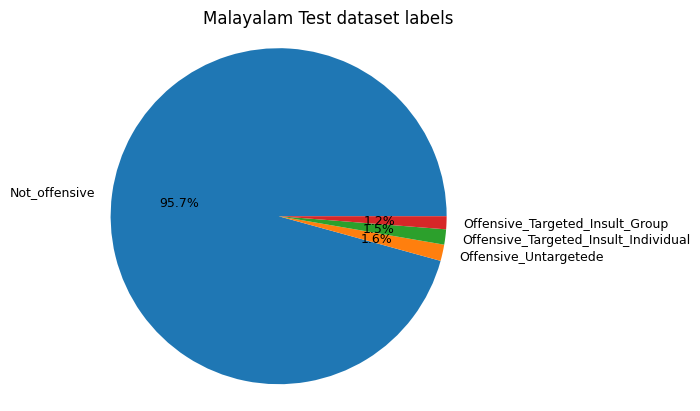

In [7]:
import matplotlib.pyplot as plt

# Get label counts
label_counts =test_dfs['malayalam']['labels'].value_counts()

# Create a pie chart
plt.pie(label_counts.values, labels=label_counts.index, autopct=lambda pct: f"{pct:.1f}%", textprops={'fontsize': 9})
plt.axis('equal')
plt.title('Malayalam Test dataset labels', x = 0.6)
plt.show()

In [8]:
unique_labels = list(train_dfs['tamil']['labels'].unique())
train_dfs['tamil']['labels'] = train_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['tamil']['labels'] = test_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))

In [9]:
unique_labels

['Not_offensive',
 'Offensive_Targeted_Insult_Other',
 'Offensive_Targeted_Insult_Group',
 'Offensive_Untargetede',
 'Offensive_Targeted_Insult_Individual']

In [10]:
train_dfs['malayalam']['labels'] = train_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['malayalam']['labels'] = test_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))

In [11]:
train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(
    lambda x: x if x in unique_labels else None)
train_dfs['kannada'].dropna(inplace=True)

train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['kannada']['labels'] = test_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))

In [12]:
pip install demoji

     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ------------------------------------ - 41.0/42.9 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 42.9/42.9 kB 526.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import re
import demoji

def getstopwords(path):
    stopwords = set()

    for lang in languages:
        f = open(path + lang + '.txt', 'r', encoding='cp437')
        stopwords = set(f.read().split('\n')) | stopwords
    return stopwords

stopwords = getstopwords('Datasets/Contents/stopwords/')

print("stopwords :-", stopwords, end='\n\n\n')

def clean(text):

    # Remove digits and punctuations    
    text = re.sub(r'\d+|', '', text)
    text = re.sub(r'\.', '', text)
    text = demoji.replace(text, '')

    # Remove stopwords    
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text

def preprocess(DFs):

    # combine all languages sentence into a single DataFrame
    df = pd.concat([DFs[lang] for lang in languages], ignore_index=True)

    # clean sentences
    df['sentence'] = df['sentence'].apply(clean)

    return df

df = preprocess(train_dfs)
df


stopwords :- {'α┤çα┤╡α┤┐α┤ƒα╡åα┤»α╡üα┤é', 'α«Äα«▓α»ìα«▓α«╛α««α»ì', 'α«àα«▓α»ìα«▓α«ñα»ü', 'α«çα«▓α»ìα«▓α»ê', 'α«çα«░α»üα«¿α»ìα«ñ', 'α▓«α│éα▓▓α▓ò', 'α▓¬α│ìα▓░α▓ñα▓┐', 'α«¬α«┐α«⌐α»ì', 'α«¿α«╛α««α»ì', 'α«çα«ñα«▒α»ìα«òα»ü', 'α▓àα▓╡α▓░α│ü', 'α«╡α«┐α«ƒα»ìα«ƒα»ü', 'α▓àα▓ªα▓░', 'α▓ñα▓«α│ìα▓«', 'α▓╡α▓┐α▓╢α│çα▓╖', 'α┤àα┤ñα┤┐α┤¿α╡ì', 'α┤çα┤ñα┤┐α┤¿α╡üα┤╢α╡çα┤╖α┤é', 'α«¬α«┐α«▒', 'α▓çα▓╡α│ü', 'α┤çα┤ñα╡üα┤╡α┤░α╡å', 'α«àα«Öα»ìα«òα»ç', 'α▓╣α▓▓α▓╡α▓╛α▓░α│ü', 'α▓å', 'α▓àα▓╡α▓¿', 'α▓ñα▓¿α│ìα▓¿', 'α┤àα┤▓α╡ìα┤▓α╡åα┤Öα╡ìα┤òα┤┐α╡╜', 'α▓╣α▓╛α▓ùα│é', 'α▓«α│üα▓éα▓ªα│å', 'α▓«α│üα▓éα▓ñα▓╛α▓ª', 'α▓çα▓╡α▓░α│ü', 'α▓»α▓╛α▓╡', 'α┤çα┤ñα┤┐α┤¿α╡åα┤ñα╡ìα┤ñα┤¿α╡ìα┤¿α╡ü', 'α▓╕α▓┐', 'α««α«ƒα»ìα«ƒα»üα««α»ç', 'α«çα«ñα»ü', 'α▓╕α▓éα▓¼α▓éα▓ºα▓┐α▓╕α▓┐α▓ª', 'α«çα«ñα»ê', 'α«¬α«▓α«░α»üα««α»ì', 'α««α»çα«▓α»üα««α»ì', 'α«Äα«⌐α»ìα«¬α«ñα»ü', 'α««α«┐α«ò', 'α«Äα«⌐α»ì', 'α«ëα«⌐α»ì', 'α«¬α«▓α»ìα«╡α»çα«▒α»ü', 'α▓¬α│ìα▓░α▓òα▓╛α▓░', 'α«àα«ñα«⌐α«╛α«▓α»ì', 'α«çα«░α»üα«¿α»ìα«ñα»ü', 'α▓òα▓╛α▓▓', 'α▓¼α▓┐', 'α▓àα▓Ñα▓╡α▓╛', 'α▓Äα▓éα▓¼α│üα▓ªα│ü', 'α▓░α│Çα

,sentence,labels
0,movie vara level la Erika poguthu,0
1,Padam nalla comedy padama irukum polaye,0
2,karthick subburaj anne intha padam vetri adaya...,0
3,கவுண்டர் தேவர்சார்பாக வெற்றி பெற வாழ்த்துக்கள்,0
4,ippo intha trailer ah parkuravana oru like pod...,0
...,...,...
50379,@Gajendra hv neen en maadirodu mele,4
50380,Sir neev adthidda game yavdu,0
50381,Dubb Full movie in telugu,0
50382,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,0


In [15]:
pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/20/0a/739426a81f7635b422fbe6cb8d1d99d1235579a6ac8024c13d743efa6847/transformers-4.36.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     ------------------------- ------------- 81.9/126.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 126.8/126.8 kB 1.8 MB/s eta 0:00:00
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/3d/0a/aed3253a9ce63d9c90829b1d36bc44ad966499ff4f5827309099c8c9184b/huggingface_hub-0.20.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyyaml>=5.1 from https://files.pythonhosted.org/packages/24/97/9b59b43431f98d01806b2885


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import re
from collections import Counter
import numpy as np
import torch

class Tokenizer:
    def __init__(self, num_words=None):
        self.num_words = num_words
        self.word_counts = Counter()
        self.word_index = {}
        self.index_word = {}
        self.special_tokens = {
            '[PAD]': 0,
            '[UNK]': 1,
            '[CLS]': 2,
            '[SEP]': 3,
            '[MASK]': 4
        }
        self.num_special_tokens = len(self.special_tokens)
    
    def fit_on_texts(self, texts):
        for text in texts:
            words = text.split()
            self.word_counts.update(words)
        
        if self.num_words is not None:
            self.word_counts = dict(self.word_counts.most_common(self.num_words - self.num_special_tokens))
        
        for i, word in enumerate(self.special_tokens.keys()):
            self.word_index[word] = i
            self.index_word[i] = word
    
    def encode_plus(self, text, add_special_tokens=True, max_length=64, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt'):

        if add_special_tokens:
            text = f"{self.special_tokens['[CLS]']} {text} {self.special_tokens['[SEP]']}"
        input_ids = [self.word_index.get(word, self.special_tokens['[UNK]']) for word in text]
        attention_mask = [1] * len(input_ids)

        if pad_to_max_length:
            padding_length = max_length - len(input_ids)
            if padding_length > 0:
                input_ids += [self.special_tokens['[PAD]']] * padding_length
                attention_mask += [0] * padding_length
        output = {"input_ids": input_ids}
        if return_attention_mask:
            output["attention_mask"] = attention_mask
        if return_tensors == "pt":
            output = {k: v for k, v in output.items()}
        return output


In [17]:
pip install torch

Note: you may need to restart the kernel to use updated packages.Collecting torch
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/16/bf/2ba0f0f7c07b9a14c027e181e44c58824e13f7352607ed32db18321599a2/torch-2.1.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB 435.7 kB/s eta 0:00:14
      --------------------------------------- 0.1/5.7 MB 1.2 MB/s eta 0:00:05
     - -------------------------------------- 0.2/5.7 MB 1.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.3/5.7 MB 1.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/5.7 MB 1.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.7 MB 1.7 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.7 MB 1.7 MB/s eta 0:00:04
     ---- ----------------------------------- 0.6/5.7 MB 1.7 MB/s eta 0:00:04
     ----- ------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
tamil_train_df = train_dfs['tamil']
tamil_test_df = test_dfs['tamil']

train_sentence_max_length = max([len(sentence.split()) for sentence in tamil_train_df['sentence'].tolist()])
test_sentence_max_length = max([len(sentence.split()) for sentence in tamil_test_df['sentence'].tolist()])

vocabulary = set(' '.join(tamil_train_df['sentence'].tolist()).split())
len(vocabulary)

76044

In [20]:
train_sentence_max_length
test_sentence_max_length

74

In [21]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tamil_train_df['sentence'].tolist())

In [22]:
train_sent_encodings = [tokenizer.encode_plus(text, max_length=train_sentence_max_length) for text in tamil_train_df['sentence'].tolist()]
train_labels = tamil_train_df['labels'].tolist()

test_sent_encodings = [tokenizer.encode_plus(text, test_sentence_max_length) for text in tamil_test_df['sentence'].tolist()]
test_labels = tamil_test_df['labels'].tolist()

labels_count = len(set(train_labels))

labels_count

5

In [23]:
import torch
from transformers import BertConfig, BertModel

# model architecture
config = BertConfig(
    vocab_size=10000,
    hidden_size=768,
    num_hidden_layers=12,
    num_attention_heads=12,
    intermediate_size=3072,
)

model = BertModel(config)

# Create the classification head
classification_head = torch.nn.Linear(config.hidden_size, labels_count)

# Set the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

classification_head.to(device)


c:\Users\MI\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Linear(in_features=768, out_features=5, bias=True)

In [24]:
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        input_ids = self.data[index]['input_ids']
        mask_attentions = self.data[index]['attention_mask']
        label = self.labels[index]
        return input_ids, mask_attentions, label


In [25]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset, DataLoader

# Define the batch size
batch_size = 32

# Get the input ids for each sentence
input_ids = [torch.tensor(d['input_ids']) for d in train_sent_encodings]

max_length = max([tensor.size() for tensor in input_ids])[0]

def padded_sequence(key, max_length):
    padded_input_ids = []
    for encoding in train_sent_encodings:
        input_ids = encoding[key]
        if len(input_ids) > max_length:
            input_ids = input_ids[:max_length]
        padding_length = max_length - len(input_ids)
        padded_input_ids.append(torch.tensor(input_ids + [0] * padding_length))
    return padded_input_ids

padded_input_ids = padded_sequence('input_ids', max_length)
padded_input_ids = pad_sequence(padded_input_ids, batch_first=True, padding_value=0)

padded_attention_mask = padded_sequence('attention_mask', max_length)
padded_attention_mask = pad_sequence(padded_attention_mask, batch_first=True, padding_value=0)

# Combine the input_ids and attention_mask tensors into a single tensor
padded_inputs = torch.stack((padded_input_ids, padded_attention_mask), dim=2)

# Create a TensorDataset from the inputs and labels
dataset = TensorDataset(padded_inputs, torch.tensor(train_labels))

# Create a DataLoader from the dataset
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [26]:
from torch.nn.utils.rnn import pad_sequence

# Define the batch size
batch_size = 32

# Get the input ids for each sentence
input_ids = [torch.tensor(d['input_ids']) for d in test_sent_encodings]

def padded_sequence(key, max_length):
    padded_input_ids = []
    for encoding in test_sent_encodings:
        input_ids = encoding[key]
        if len(input_ids) > max_length:
            input_ids = input_ids[:max_length]
        padding_length = max_length - len(input_ids)
        padded_input_ids.append(torch.tensor(input_ids + [0] * padding_length))
    return padded_input_ids

padded_input_ids = padded_sequence('input_ids', max_length)
padded_input_ids = pad_sequence(padded_input_ids, batch_first=True, padding_value=0)

padded_attention_mask = padded_sequence('attention_mask', max_length)
padded_attention_mask = pad_sequence(padded_attention_mask, batch_first=True, padding_value=0)

# Pad the sequences with the special padding token
padded_input_ids = pad_sequence(padded_input_ids, batch_first=True, padding_value=0)
padded_attention_mask = pad_sequence(padded_attention_mask, batch_first=True, padding_value=0)

# Combine the input_ids and attention_mask tensors into a single tensor
padded_inputs = torch.stack((padded_input_ids, padded_attention_mask), dim=2)

# Create a TensorDataset from the inputs and labels
dataset = TensorDataset(padded_inputs, torch.tensor(test_labels))

# Create a DataLoader from the dataset
test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [29]:
def flat_accuracy(logits, labels):
    # convert logits and labels to numpy arrays
    logits = logits.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()

    # compute the predictions by taking the argmax of the logits
    preds = np.argmax(logits, axis=1)

    # compute the accuracy by comparing the predictions to the labels
    accuracy = np.sum(preds == labels) / len(labels)

    print("accuracy:- ", accuracy)

    return accuracy

In [ ]:
from transformers import AdamW

# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)

# Set the number of training epochs
epochs = 5

# Total number of training steps is number of batches * number of epochs
total_steps = len(train_dataloader) * epochs



# Train the model
for epoch in range(epochs):

    print("Epoch {}/{}".format(epoch+1, epochs))

    # Set the model to training mode
    model.train()

    # Initialize variables to track training loss and accuracy
    total_train_loss = 0
    total_train_accuracy = 0
    total_train_steps = 0

    # Iterate over the training data
    for step, batch in enumerate(train_dataloader):
        # Unpack the batch
        batch_input_ids = batch[0][0].to(device)
        batch_attention_masks = batch[0][1].to(device)
        batch_labels = batch[1].to(device)

        # Clear any previously calculated gradients
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch)
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)

        # Get the loss and logits
        loss = outputs[0].mean()
        print("loss", loss, outputs[0], sep='\n')
        logits = outputs[1]

        # Compute the training loss and accuracy for this batch
        total_train_loss += loss.item()
        total_train_accuracy += flat_accuracy(logits, batch_labels)
        total_train_steps += 1

        # Backpropagate the loss and calculate the gradients
        loss.backward()

        # Clip the gradients to avoid exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update the model parameters
        optimizer.step()

    # Calculate the average training loss and accuracy for this epoch
    avg_train_loss = total_train_loss / total_train_steps
    avg_train_accuracy = total_train_accuracy / total_train_steps

    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to track validation loss and accuracy
    total_val_loss = 0
    total_val_accuracy = 0
    total_val_steps = 0

    # Print the training loss and accuracy for this epoch
    print("\nAverage training loss: {:.4f}".format(avg_train_loss))
    print("Average training accuracy: {:.4f}".format(avg_train_accuracy))

    # Iterate over the validation data
    for batch in test_dataloader:
        # Unpack the batch
        batch_input_ids = batch[0][0].to(device)
        batch_attention_masks = batch[0][1].to(device)
        batch_labels = batch[1].to(device)

        # Don't compute gradients during validation
        with torch.no_grad():
            # Perform a forward pass (evaluate the model on this validation batch)
            outputs = model(batch_input_ids, attention_mask=batch_attention_masks)

            # Get the loss and logits
            loss = outputs[0].mean()
            logits = outputs[1]

            # Compute the validation loss and accuracy for this batch
            total_val_loss += loss.item()
            total_val_accuracy += flat_accuracy(logits, batch_labels)
            total_val_steps += 1

    # Calculate the average validation loss and accuracy for this epoch
    avg_val_loss = total_val_loss / total_val_steps
    avg_val_accuracy = total_val_accuracy / total_val_steps

    # Print the validation loss and accuracy for this epoch
    print("\nAverage testing loss: {:.4f}".format(avg_val_loss))
    print("Average testing accuracy: {:.4f}".format(avg_val_accuracy))


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the input sentences
def get_dataLoader(sentences, labels):
    max_len = 32
    input_ids = []
    attention_masks = []
    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,
                            add_special_tokens = True,
                            max_length = max_len,
                            pad_to_max_length = True,
                            return_attention_mask = True,
                            return_tensors = 'pt',
                    )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    # Create a PyTorch DataLoader for the data
    dataset = TensorDataset(input_ids, attention_masks, labels)
    dataloader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=32)

    return dataloader

In [ ]:
# Load the pre-trained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=labels_count)

# Set the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

num_epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Set the loss function and move the model to the device
loss_fn = torch.nn.CrossEntropyLoss()
model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
def train(model, train_dataloader, num_epochs):
    loss_list = []
    # Train the model
    for epoch in range(num_epochs):
        total_loss = 0
        model.train()
        for step, batch in enumerate(train_dataloader):
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)
            model.zero_grad()
            outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
            loss = loss_fn(outputs[0], batch_labels)
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
        avg_loss = total_loss / len(train_dataloader)
        loss_list.append(avg_loss)
        print('Epoch:', epoch+1, 'Average Loss:', avg_loss)
    return model, loss_list

In [ ]:
def test(model, test_dataloader, num_epochs):
    # Evaluate the model on the validation set
    pred_labels, true_labels = [], []
    for epoch in range(num_epochs):
        model.eval()
        test_accuracy = 0
        for batch in test_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)
            with torch.no_grad():
                outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs[0]
            preds = torch.argmax(logits, dim=1)
            pred_labels.extend(preds.cpu().numpy().tolist())
            true_labels.extend(batch_labels.cpu().numpy().tolist())
            test_accuracy += accuracy_score(batch_labels.cpu(), preds.cpu())

        test_accuracy /= len(test_dataloader)
        print('Epoch:', epoch+1, 'Test Accuracy:', test_accuracy)
        return true_labels, pred_labels

In [ ]:
import matplotlib.pyplot as plt
def draw_curve(values):

    plt.plot([i+1 for i in range(len(values))], values)
    
    # Set the x-axis label
    plt.xlabel('Epochs')

    # Set the y-axis label
    plt.ylabel('Loss')

    # Show the plot
    plt.show()

In [ ]:
# Define the data and train the model with all languages

def trainall(model):
    bert_model = model
    for lang in languages:
        print(lang, end=' :- \n\n')
        input_sentences = train_dfs[lang]['sentence'].tolist()
        output_labels = train_dfs[lang]['labels'].tolist()

        train_dataloader = get_dataLoader(input_sentences, output_labels)

        bert_model, loss_list = train(bert_model, train_dataloader, 3)
        draw_curve(loss_list)
        print()
        
    return bert_model

model = trainall(model)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 1 Average Loss: 0.5836537065155922
Epoch: 2 Average Loss: 0.4686600086707918
Epoch: 3 Average Loss: 0.38620302315150934
Epoch: 4 Average Loss: 0.3422081141741503
Epoch: 5 Average Loss: 0.34306236697094783
Epoch: 6 Average Loss: 0.34381239527274693
Epoch: 7 Average Loss: 0.3424565047640649
Epoch: 8 Average Loss: 0.34309519016553486
Epoch: 9 Average Loss: 0.3416714155437454
Epoch: 10 Average Loss: 0.3426428126271755


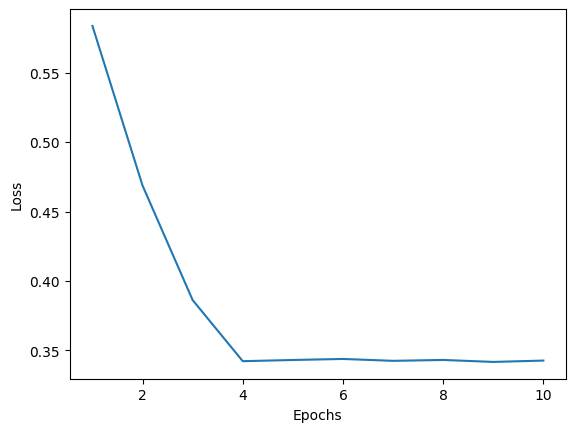

In [ ]:
# Define the data and train the model with all languages

def trainall_with_curve(model):
    bert_model = model
    input_sentences = []
    output_labels = []
    for lang in languages:
        input_sentences += train_dfs[lang]['sentence'].tolist()
        output_labels += train_dfs[lang]['labels'].tolist()

    train_dataloader = get_dataLoader(input_sentences, output_labels)

    bert_model, loss_list = train(bert_model, train_dataloader, 10)
    draw_curve(loss_list)
    
    return bert_model

model = trainall_with_curve(model)

In [ ]:
# Define the data and test the model with all languages

def testall(model):
    for lang in languages:
        print(lang, end=' :- \n\n')
        input_sentences = test_dfs[lang]['sentence'].tolist()
        output_labels = test_dfs[lang]['labels'].tolist()

        test_dataloader = get_dataLoader(input_sentences, output_labels)

        test(model, test_dataloader, 3)

        print()
    return model

model = testall(model)

tamil :- 

Epoch: 1 Test Accuracy: 0.771849593495935
Epoch: 2 Test Accuracy: 0.7723577235772358
Epoch: 3 Test Accuracy: 0.771849593495935

malayalam :- 



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 1 Test Accuracy: 0.9633620689655172
Epoch: 2 Test Accuracy: 0.9633620689655172
Epoch: 3 Test Accuracy: 0.9630387931034483

kannada :- 



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 1 Test Accuracy: 0.7765092879256966
Epoch: 2 Test Accuracy: 0.772155572755418
Epoch: 3 Test Accuracy: 0.772155572755418



In [ ]:
all_sentences = []
all_labels = []
for lang in languages:
        all_sentences = all_sentences + test_dfs[lang]['sentence'].tolist()
        all_labels = all_labels + test_dfs[lang]['labels'].tolist()

test_dataloader = get_dataLoader(all_sentences, all_labels)

true_labels, pred_labels = test(model, test_dataloader, 1)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 1 Test Accuracy: 0.827567899018904


In [ ]:
list(test_dataloader)

In [ ]:
y_true, y_pred = true_labels, pred_labels

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy

0.8274343243668397

In [ ]:
precision

array([0.89165154, 0.        , 0.3062201 , 0.39943343, 0.49824561])

In [ ]:
recall

array([0.95157854, 0.        , 0.20125786, 0.34987593, 0.35949367])

In [ ]:
f1_score

array([0.92064087, 0.        , 0.24288425, 0.37301587, 0.41764706])

In [ ]:
cm

array([[4913,    0,   68,   98,   84],
       [  46,    0,   10,   17,    5],
       [ 166,    0,   64,   60,   28],
       [ 201,    0,   35,  141,   26],
       [ 184,    0,   32,   37,  142]])

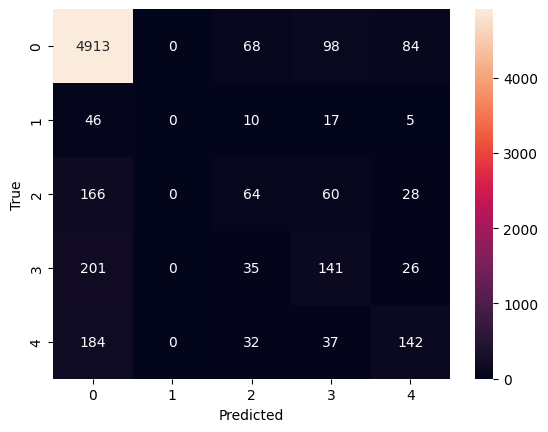

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


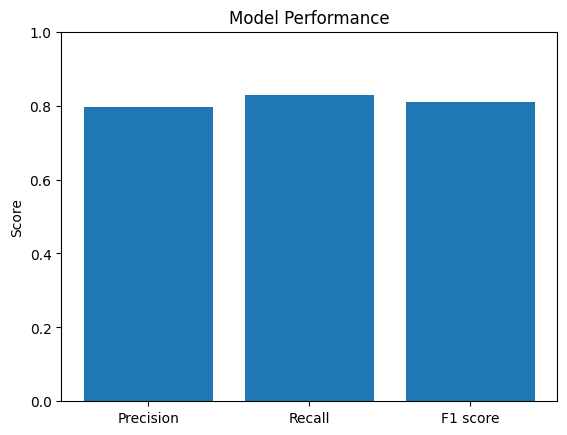

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1 score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Performance')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

# Create a line plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()


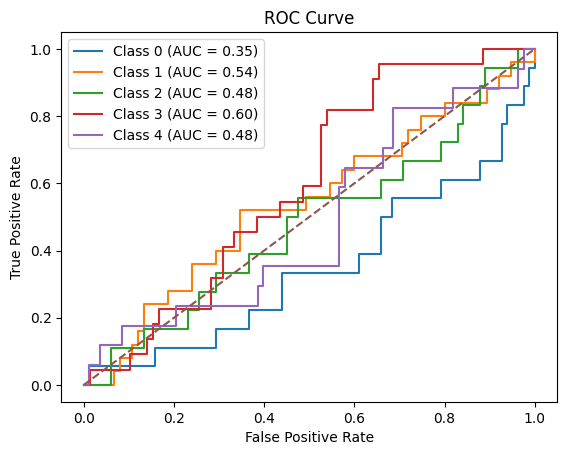

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate random multiclass labels
num_classes = 5
y_true = np.random.randint(num_classes, size=100)
y_score = np.random.rand(100, num_classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true == i, y_score[:, i])

# Plot ROC curve for each class
fig, ax = plt.subplots()
for i in range(num_classes):
    ax.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate random labels and predictions
y_true = np.random.randint(0, 5, size=100)
y_pred = np.random.randint(0, 5, size=100)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])

# Extract counts of TN, FP, FN, TP
tn, fp, fn, tp = cm.ravel()

print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

n_classes = 5
y_true = [1, 0, 2, 3, 1, 4, 0, 2, 3, 4]
y_pred = [1, 1, 2, 3, 0, 4, 0, 2, 3, 4]

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))

# Compute the TN, FP, FN, and TP for each class
tn = []
fp = []
fn = []
tp = []
for i in range(n_classes):
    tn_i = np.sum(np.delete(np.delete(cm, i, 0), i, 1))
    fp_i = np.sum(np.delete(cm, i, 0)[:, i])
    fn_i = np.sum(cm[i, :]) - cm[i, i]
    tp_i = cm[i, i]
    tn.append(tn_i)
    fp.append(fp_i)
    fn.append(fn_i)
    tp.append(tp_i)

# Print the counts for each class
for i in range(n_classes):
    print(f"Class {i}: TN = {tn[i]}, FP = {fp[i]}, FN = {fn[i]}, TP = {tp[i]}")


Class 0: TN = 7, FP = 1, FN = 1, TP = 1
Class 1: TN = 7, FP = 1, FN = 1, TP = 1
Class 2: TN = 8, FP = 0, FN = 0, TP = 2
Class 3: TN = 8, FP = 0, FN = 0, TP = 2
Class 4: TN = 8, FP = 0, FN = 0, TP = 2


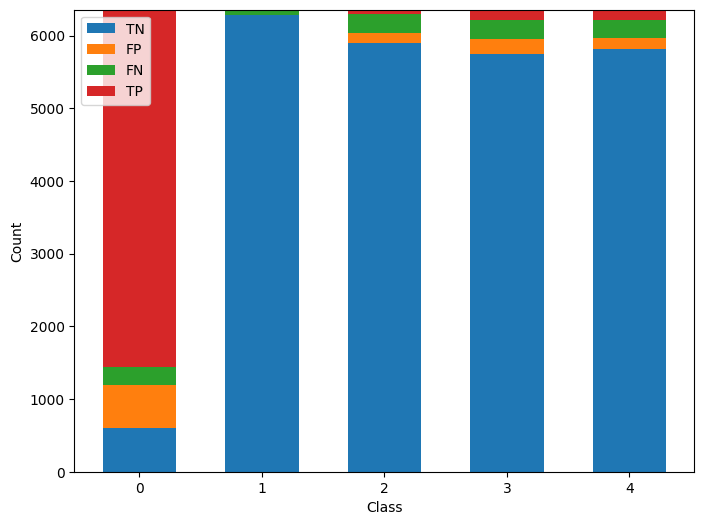

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

n_classes = 5

# Compute the confusion matrix and the TN, FP, FN, and TP for each class
cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))
tn = []
fp = []
fn = []
tp = []
for i in range(n_classes):
    tn_i = np.sum(np.delete(np.delete(cm, i, 0), i, 1))
    fp_i = np.sum(np.delete(cm, i, 0)[:, i])
    fn_i = np.sum(cm[i, :]) - cm[i, i]
    tp_i = cm[i, i]
    tn.append(tn_i)
    fp.append(fp_i)
    fn.append(fn_i)
    tp.append(tp_i)

# Plot the stacked bar chart
labels = list(range(n_classes))
plt.figure(figsize=(8, 6))
plt.bar(labels, tn, width=0.6, label='TN')
plt.bar(labels, fp, width=0.6, bottom=tn, label='FP')
plt.bar(labels, fn, width=0.6, bottom=np.array(tn)+np.array(fp), label='FN')
plt.bar(labels, tp, width=0.6, bottom=np.array(tn)+np.array(fp)+np.array(fn), label='TP')
plt.xticks(labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(model, all_sentences, all_labels)
plt.show()


In [ ]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(model, all_sentences, all_labels)
plt.show()
